In [1]:
# Import des bibliothèques nécessaires
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

/Users/alix/PycharmProjects/T-ESP-900-esp902-56264-ESP-DJ-4/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Définir le chemin du dossier contenant le dataset
dataset_path = './dataset'

In [3]:
# Définir les dimensions des images d'entrée
img_width, img_height = 512, 384

In [4]:
# Définir les paramètres du modèle
epochs = 20
batch_size = 32

In [5]:
# Créer un générateur d'images à partir du dossier dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# Créer des générateurs pour les ensembles d'entraînement et de validation
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [7]:
# Créer le modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes (cardboard, glass, metal, paper, plastic, trash)

In [8]:
# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Entraîner le modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
63/63 [==============================] - 122s 2s/step - loss: 2.8392 - accuracy: 0.3218 - val_loss: 1.5832 - val_accuracy: 0.3438
Epoch 2/20
63/63 [==============================] - 119s 2s/step - loss: 1.3934 - accuracy: 0.4533 - val_loss: 1.4527 - val_accuracy: 0.4021
Epoch 3/20
63/63 [==============================] - 100s 2s/step - loss: 1.1773 - accuracy: 0.5557 - val_loss: 1.3485 - val_accuracy: 0.4854
Epoch 4/20
63/63 [==============================] - 87s 1s/step - loss: 0.8869 - accuracy: 0.6767 - val_loss: 1.4883 - val_accuracy: 0.4812
Epoch 5/20
63/63 [==============================] - 87s 1s/step - loss: 0.5906 - accuracy: 0.7866 - val_loss: 1.5056 - val_accuracy: 0.4917
Epoch 6/20
63/63 [==============================] - 90s 1s/step - loss: 0.3709 - accuracy: 0.8820 - val_loss: 1.9029 - val_accuracy: 0.5042
Epoch 7/20
63/63 [==============================] - 101s 2s/step - loss: 0.2323 - accuracy: 0.9267 - val_loss: 2.2113 - val_accuracy: 0.5125
Epoch 8/20
63/63

In [11]:
# Sauvegarder le modèle
model.save('trash_detection_model.keras')

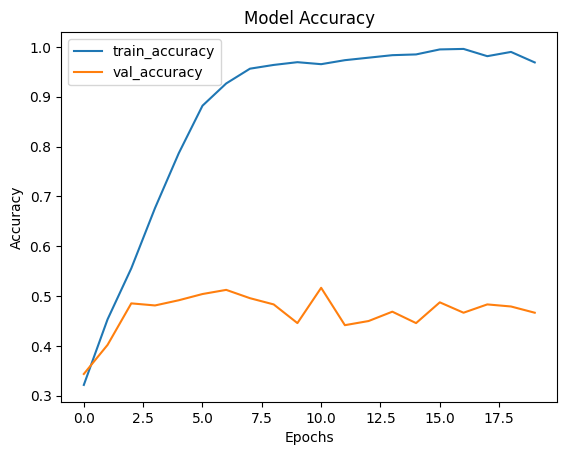

In [12]:
# Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

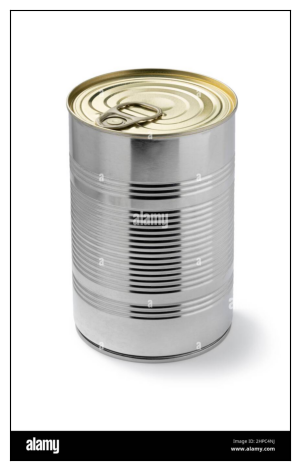

1/1 [==============================] - 0s 109ms/step
Classe prédite : metal


In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.image as mpimg
import os
import random
import matplotlib.pyplot as plt

# Charger le modèle pré-entraîné
model = load_model('trash_detection_model.keras')

path = "./Random"

def getRandomPath():
    return os.path.join(path, random.choice(os.listdir(path)))

# img_path = getRandomPath() 
img_path = "./Random/metal.jpeg"

# img = mpimg.imread(getRandomPath())
img = mpimg.imread(img_path)
plt.subplot(1, 1, 1)
plt.imshow(img)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

# Chargement de l'image de test
img = image.load_img(img_path, target_size=(512, 384))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisation des pixels

# Prédiction de la classe
prediction = model.predict(img_array)

# Affichage des résultats
class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
predicted_class = class_labels[np.argmax(prediction)]

print(f"Classe prédite : {predicted_class}")
